In [35]:
# Project
# github restricts file size, dataset can be downloaded from https://www.kaggle.com/gyani95/380000-lyrics-from-metrolyrics/data


<h1 align = "center">Genre Classification by Lyric Analysis</h1>
<h2 align = "center">Dataming Project</h2>

<h2>Introduction</h2>
<p>
Online streaming platforms like Apple Music and Spotify add new songs to their collection daily. Each platform gives users the ability to listen to and download millions unque of songs. These songs are catalogued and categorized so that music listeners may find new songs that match their unique tastes. 

Organizing songs by genre is an old and familiar technique to categorize music and make it easier for listeners to find songs they like. To classify songs into genres manually, someone would need to listen to it and select the genre that best applies. This is hard and very time-consuming job. They would require a knowledge of ,many different genres, types of music and the nuances between them. 

Machine learning and text lyric analysis can aid in this pursuit. 
</p>

<p>
This report serves to identify if there is a link between word frequency within the lyrics of a song and genre that the song belongs to. By using different machine learning techniques and word frequency analysis ....

</p>


<h2>The Dataset</h2>
<p>The dataset can be obtained</p>

In [9]:
# import the dataset
import matplotlib
import io
import pandas as pd

data = pd.read_csv('lyrics.csv')
data.head()

# temp so that it runs during testing
# data = data[:1000]

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [10]:
# preprocess the data

# remove all the genres with not avaliable and other
data = data[data.genre != 'Not Available']
data = data[data.genre != 'Other']

# remove all the data with no lyrics
data.dropna(subset=['lyrics'], inplace=True)

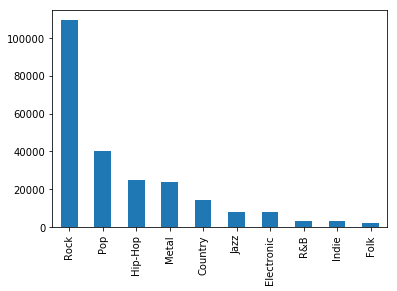

In [11]:

data['genre'].value_counts().plot(kind='bar')

<h3>Imbalanced Data</h3>
<p>This graph shows us that the dataset has some very imbalanced data. There is a disportionate amount of rock songs than others. With this dataset, if an algorithm guessed rock 100% of the time, it would achieve around 50% accuracy for this class. </p>

<p>To address the issue of imbalanced data, we take a balanced sample from our dataset since it is quite large to begin with</p>

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords

# max_features : a maximum of 1500 columns
# min_df : the word must occur in a mininum of 5 documents
# max_df : the word occurs in less than 70 percent of the documents (words appearing in all are useless)
# nltk.download('stopwords')
vectorizer = CountVectorizer(max_features=1500, min_df=2, max_df=0.7, stop_words=stopwords.words('english'), token_pattern = '[a-zA-Z]+')

# creates a bag of words
X = vectorizer.fit_transform(data.lyrics.values.astype('str'))

# creates y, which is our genre class
y = data.genre

# visualize the transformed data 
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

,10,24,2x,40,4x,absent,achtung,across,act,acted,...,za,zaman,zlar,zlä,zu,zum,zä,ã¼ndã¼m,ã¼nkã¼,ã¼ã
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
,# find the TFID reference: http://www.tfidf.com/
# mitigates the fact that the word may have a high frequency in other documents

# TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).
# IDF(t) = log_e(Total number of documents / Number of documents with term t in it). <-- appro 
    # if all documents have the term in it then it has a score of 0 TF * log(1) = 0
    # it will weigh rare words heigher 

# TFIDF = TF * IDF

from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X)

In [17]:
# notice how the data is now altered based on the word frequency
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

,10,24,2x,40,4x,absent,achtung,across,act,acted,...,za,zaman,zlar,zlä,zu,zum,zä,ã¼ndã¼m,ã¼nkã¼,ã¼ã
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.109817,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# split X and y into training a test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [19]:

def train_predict(classifiers):
    for classifier in classifiers:
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        print(classifier.__class__.__name__, accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report

classifers = [RandomForestClassifier(), MultinomialNB(), LogisticRegression()]
train_predict(classifers)

/Users/nathanjenkins/opt/anaconda3/envs/mining/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/nathanjenkins/opt/anaconda3/envs/mining/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
RandomForestClassifier 0.616
               precision    recall  f1-score   support

      Country       0.00      0.00      0.00        13
   Electronic       0.00      0.00      0.00         4
      Hip-Hop       0.94      0.74      0.83        23
         Jazz       0.00      0.00      0.00         9
        Metal       0.20      1.00      0.33         2
Not Available       1.00      0.36      0.53        14
        Other       0.84      0.61      